TensorFlow version: 2.19.0
TASK 1: FEEDFORWARD NEURAL NETWORK (NN)
Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10
Flattened input shape: (60000, 784)
One-hot encoded labels shape: (60000, 10)

Building Feedforward Neural Network...

FNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training FNN model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8721 - loss: 0.4314 - val_accuracy: 0.9590 - val_loss: 0.1272
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9658 - loss: 0.1122 - val_accuracy: 0.9695 - val_loss: 0.1000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9771 - loss: 0.0724 - val_accuracy: 0.9697 - val_loss: 0.0969
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9677 - val_loss: 0.1063
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9728 - val_loss: 0.0925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9747 - val_loss: 0.0966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9913 - loss: 0.0252 - val_accuracy: 0.9743 - val_loss: 0.0949
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accura

"# Show some predictions\nplt.subplot(1, 3, 3)\npredictions = fnn_model.predict(x_test_flat[:16])\npredicted_classes = np.argmax(predictions, axis=1)\n\nfor i in range(16):\n    plt.subplot(4, 4, i + 1)\n    plt.imshow(x_test_mnist[i], cmap='gray')\n    plt.title(f'True: {y_test_mnist[i]}, Pred: {predicted_classes[i]}')\n    plt.axis('off')\n\nplt.tight_layout()\nplt.show()"

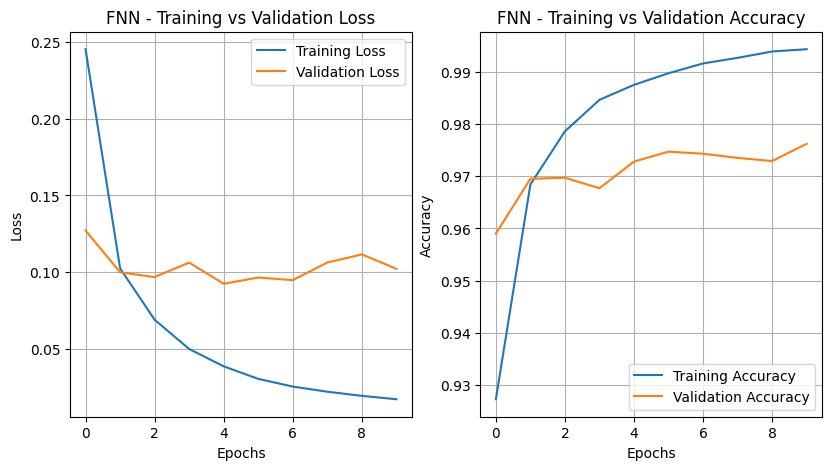

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)

print("TASK 1: FEEDFORWARD NEURAL NETWORK (NN)")

# Load and preprocess MNIST dataset
print("Loading MNIST dataset...")
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train_mnist.shape}")
print(f"Test data shape: {x_test_mnist.shape}")
print(f"Number of classes: {len(np.unique(y_train_mnist))}")

# Preprocess the data
# Normalize pixel values
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0

# Flatten images for feedforward network (28x28)
x_train_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)
x_test_flat = x_test_mnist.reshape(x_test_mnist.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_mnist_cat = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist_cat = keras.utils.to_categorical(y_test_mnist, 10)

print(f"Flattened input shape: {x_train_flat.shape}")
print(f"One-hot encoded labels shape: {y_train_mnist_cat.shape}")

# Build Feedforward Neural Network
print("\nBuilding Feedforward Neural Network...")
fnn_model = keras.Sequential([
    layers.Input(shape=(784,)),                    # Input layer
    layers.Dense(128, activation='relu'),          # Hidden layer 1
    layers.Dense(64, activation='relu'),           # Hidden layer 2
    layers.Dense(10, activation='softmax')         # Output layer
])

# Compile the model
fnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nFNN Model Architecture:")
fnn_model.summary()

# Train the model
print("\nTraining FNN model...")
fnn_history = fnn_model.fit(
    x_train_flat, y_train_mnist_cat,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_flat, y_test_mnist_cat),
    verbose=1
)

# Evaluate the model
fnn_loss, fnn_accuracy = fnn_model.evaluate(x_test_flat, y_test_mnist_cat, verbose=0)
print(f"\nFNN Test Accuracy: {fnn_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fnn_history.history['loss'], label='Training Loss')
plt.plot(fnn_history.history['val_loss'], label='Validation Loss')
plt.title('FNN - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(fnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

"""# Show some predictions
plt.subplot(1, 3, 3)
predictions = fnn_model.predict(x_test_flat[:16])
predicted_classes = np.argmax(predictions, axis=1)

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test_mnist[i], cmap='gray')
    plt.title(f'True: {y_test_mnist[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()"""



TASK 2: CONVOLUTIONAL NEURAL NETWORK (CNN)
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10
Normalized input shape: (50000, 32, 32, 3)

Building Convolutional Neural Network...

CNN Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,890 (2.80 MB)

 Trainable params: 734,890 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 119ms/step - accuracy: 0.2867 - loss: 1.8932 - val_accuracy: 0.5394 - val_loss: 1.2714
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 118ms/step - accuracy: 0.5287 - loss: 1.3049 - val_accuracy: 0.6079 - val_loss: 1.1058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.5890 - loss: 1.1481 - val_accuracy: 0.6543 - val_loss: 0.9756
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 121ms/step - accuracy: 0.6305 - loss: 1.0506 - val_accuracy: 0.6773 - val_loss: 0.9161
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 117ms/step - accuracy: 0.6524 - loss: 0.9908 - val_accuracy: 0.6933 - val_loss: 0.8761
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 117ms/step - accuracy: 0.6697 - loss: 0.9447 - val_accuracy: 0.7024 - val_loss: 0.8618
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 117ms/step - accuracy: 0.6825 - loss: 0.9028 - val_accuracy: 0.7117 - val_loss: 0.8292
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━

NameError: name 'axes' is not defined

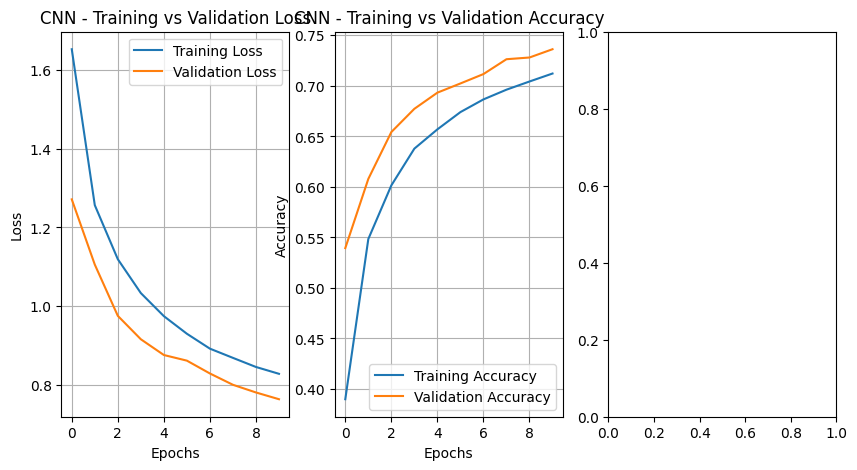

In [8]:
print("TASK 2: CONVOLUTIONAL NEURAL NETWORK (CNN)")


# Load and preprocess CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train_cifar.shape}")
print(f"Test data shape: {x_test_cifar.shape}")
print(f"Number of classes: {len(cifar10_classes)}")

# Preprocess the data
# Normalize pixel values
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Convert labels to categorical
y_train_cifar_cat = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar_cat = keras.utils.to_categorical(y_test_cifar, 10)

print(f"Normalized input shape: {x_train_cifar.shape}")

# Build Convolutional Neural Network
print("\nBuilding Convolutional Neural Network...")
cnn_model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.25),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nCNN Model Architecture:")
cnn_model.summary()

# Train the model
print("\nTraining CNN model...")
cnn_history = cnn_model.fit(
    x_train_cifar, y_train_cifar_cat,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_cifar, y_test_cifar_cat),
    verbose=1
)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cifar, y_test_cifar_cat, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
predictions_cnn = cnn_model.predict(x_test_cifar[:16])
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Original image
axes[0, 0].imshow(x_test_cifar[0])
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')


# Feature maps (showing first 7 out of 32)
for i in range(7):
    row = i // 4
    col = (i + 1) % 4
    axes[row, col].imshow(feature_maps[0, :, :, i], cmap='viridis')
    axes[row, col].set_title(f'Feature Map {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()




In [ ]:

print("TASK 3: RECURRENT NEURAL NETWORK (LSTM)")


# Load and preprocess IMDB dataset
print("Loading IMDB dataset...")
max_features = 10000  # Top 10000 most frequent words
max_len = 250  # Cut texts after this number of words

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = keras.datasets.imdb.load_data(
    num_words=max_features
)

print(f"Training sequences: {len(x_train_imdb)}")
print(f"Test sequences: {len(x_test_imdb)}")
print(f"Average training sequence length: {np.mean([len(x) for x in x_train_imdb]):.1f}")

# Pad sequences to have the same length
print("Padding sequences...")
x_train_imdb = keras.preprocessing.sequence.pad_sequences(x_train_imdb, maxlen=max_len)
x_test_imdb = keras.preprocessing.sequence.pad_sequences(x_test_imdb, maxlen=max_len)

print(f"Training data shape after padding: {x_train_imdb.shape}")
print(f"Test data shape after padding: {x_test_imdb.shape}")

# Build LSTM model
print("\nBuilding LSTM model...")
lstm_model = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.LSTM(64, dropout=0.5, recurrent_dropout=0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nLSTM Model Architecture:")
lstm_model.summary()

# Train the model
print("\nTraining LSTM model...")
lstm_history = lstm_model.fit(
    x_train_imdb, y_train_imdb,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_imdb, y_test_imdb),
    verbose=1
)

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_imdb, y_test_imdb, verbose=0)
print(f"\nLSTM Test Accuracy: {lstm_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

TASK 3: RECURRENT NEURAL NETWORK (LSTM)
Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training sequences: 25000
Test sequences: 25000
Average training sequence length: 238.7
Padding sequences...
Training data shape after padding: (25000, 250)
Test data shape after padding: (25000, 250)

Building LSTM model...

LSTM Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 403ms/step - accuracy: 0.6794 - loss: 0.5812 - val_accuracy: 0.8304 - val_loss: 0.3918
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 360s 460ms/step - accuracy: 0.8171 - loss: 0.4135 - val_accuracy: 0.8410 - val_loss: 0.3833
Epoch 3/10
438/782 ━━━━━━━━━━━━━━━━━━━━ 1:58 345ms/step - accuracy: 0.8452 - loss: 0.3667

In [ ]:
models = ['FNN (MNIST)', 'CNN (CIFAR-10)', 'LSTM (IMDB)']
accuracies = [fnn_accuracy, cnn_accuracy, lstm_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("SUMMARY")
print(f"1. Feedforward Neural Network (MNIST):     {fnn_accuracy:.4f} accuracy")
print(f"2. Convolutional Neural Network (CIFAR-10): {cnn_accuracy:.4f} accuracy")
print(f"3. LSTM Network (IMDB Sentiment):          {lstm_accuracy:.4f} accuracy")
